<a href="https://colab.research.google.com/github/ParthSharma1197/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/PARTH_SHARMA_Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Project Title` : **`CardioVascular Risk Prediction`**
Cardiovascular Risk Prediction
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

**Problem Statement(Objective):**

The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

**General Description:**

Predicting and diagnosing heart disease is the biggest challenge in the medical industry.Factors which influence heart diseases are cholesterol level of the body, smoking habit, and obesity, family history of diseases, blood pressure.Machine learning algorithms can play a vital and accurate role in predicting heart disease in coming potential years based opent the current way of living and this can potentially help the paitent to be attentive towards the declining health and necessar measures can be taken to lower down the risk. In this project we will be looking for various Machine Learning Algorithms being applied on the data set and finally choose one which gives us the best possible results and help in making more accurate predictions.

**Data Set Description**:

The dataset contains the following attributes: 
id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD

## **Loading Dataset and Importing Libraries**

In this initial section we will be looking for some initial overview of the data so that what we get to know our data.

First, we will mount the drive and  import all the python libraries that are required throughout the course of our analysis, which include NumPy for numerical calculations and scientific computing, Pandas for cleaning,performing required actions on the dataset, and Matplotlib and Seaborn that will be used for visualization and some others.

In [1]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the modules that will be required over the course of flow throughout this project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


## **We will now load the data into the colab envirnoment and perform some actions to study and clean our data.**

In [3]:
#importing the dataset in our colab envirnoment
working_dir_path ="/content/drive/MyDrive/Colab Notebooks/CAPSTONE EDA-Cardiovascular Risk Prediction/data_cardiovascular_risk.csv"
df=pd.read_csv(working_dir_path)

In [4]:
## Let's have a look first five rows of our dataset to have a lookover
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains records for {} patients.\nNumber of columns are: {} ".format(shape[0],(shape[1])))

The data set contains records for 3390 patients.
Number of columns are: 17 


In [7]:
## Learning the details of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# Getting the list of all the features
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Getting the statistical summary of our data set. Describe method,very informatively summarizes the numerical features of the data set.We can draw various conclusions. 

In [9]:
#Getting the statistical Summary of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


###  **Observations that  enlightens some keypoints :**
1. For Age,we can observ that our data set contains the data of the people whose age ranges between 32-70 years.
2. Cigrattes Per Day: We can say that the average number of cigrattes that people consume is 9 but max number being 70 that is 
   very hard to digest and can be assumed to be an outlier but we will see that in the further course of analysis.
3. Heart rate ranges from 45-143 beats per minutes with the mean value of almost 76 bpm that is nominal rate as per medical      experts. 
4. According to the medical experts the nominal range of BMI is 18.5—24.9 and here in our dataset  mean value of BMI is 25 that is average population comes under the Healthy category but the max value goes to 56 that obese category.

In [10]:
# Above observations made me curious to look at how many paitents come under the category of obese:
count=0
for bmi in df.BMI:
    if bmi >=30:
        count=count+1
print('Number of patient that comes under the category of obese are : {} '.format(count))

Number of patient that comes under the category of obese are : 439 


## **Feature Description**
### Demographic:
    • Sex: Male or Female("M" or "F").
    • Age: Age of the patient;(Continuous-Although the recorded ages have been truncated to whole numbers,the concept of age is continuous).
    • Education:Education: Educational background of the patient ranked from 1 to 4 (continuous)



    
### Behavioral
    • is_smoking: Whether or not the patient is a current smoker ("YES" or "NO")
    • Cigs Per Day: The number of cigarettes that the person smoked on average in one day.(can be
      considered continuous as one can have any number of cigarettes, even half a cigarette).
    
### Medical( history)
    • BP Meds: Whether or not the patient was on blood pressure medication (Nominal).
    • Prevalent Stroke: Whether or not the patient had previously had a stroke (Nominal).
    • Prevalent Hyp: Whether or not the patient was hypertensive (Nominal).
    • Diabetes: Whether or not the patient had diabetes (Nominal).
    
### Medical(current)
    • Tot Chol: Total cholesterol level (Continuous).
    • Sys BP: Systolic blood pressure (Continuous).
    • Dia BP: Diastolic blood pressure (Continuous).
    • BMI: Body Mass Index (Continuous).
    • Heart Rate: Heart rate (Continuous-In medical research, variables such as heart rate though in fact discrete,yet 
      are considered continuous because of large number of possible values).
    • Glucose: Glucose level (Continuous).
    • Target Variable: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# **Data Pre-processing**
Till now we only had a lookover on our data,so that we can understand a little bit about our data set and we have drawn certain observations that has been stated above and will be helpful in the further course of our analysis.Now, we will just process our data in order to make it free from anamolies so that it can be passed into our predictive algorithms.There are certain steps that are involved that are as follows:


### **1. Working on the columns and datatypes of the column.**
Since we can clearly see that the BP Meds,Prevalent Stroke,Prevalent Hyp,Diabetes are categorical in nature and since they are  numeric datatype we need to convert them so that appropiate operations could be applied.

##### I have created a function for changing the a particular datatype into the required one.

In [12]:
# Function for changing the data type
def convert_dtype(dataframe,col_list,target_dtype):

  '''Pass the name of the data frame,features to be 
    whose data type need to be changes and the target datatype.
    Function will inturn change the datatype of all the features 
    in col_list'''
  
  dataframe[col_list]=dataframe[col_list].astype(str(target_dtype))

In [13]:
## For Changing the datatype of the above stated features:
cols =['sex','education','BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes']
convert_dtype(df,cols,'object')

In [14]:
# Checking for the applied changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   object 
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   object 
 7   prevalentStroke  3390 non-null   object 
 8   prevalentHyp     3390 non-null   object 
 9   diabetes         3390 non-null   object 
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(7),

Generic check over the id column

In [15]:
#Let's have a look over the number of unique values this feature contains
df['id'].value_counts().sum()

3390

Therefore, from the above output we can say that number of unique values that id contains are 3390 and as we now that our predictive models learns through the pattern in our data and since there can be no pattern that a model could asses therefore in the next step we will drop the id column.

In [16]:
#dropping the id column
df.drop(['id'], axis = 1,inplace=True)

In [17]:
#Checking for the applied changes
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **2. Checking for the Duplicate values:**

Why do we actually need to check for duplicate values and treat them?

Data collection happens through multiple channels including online, face to face or in call centres.Holding more than one record of someone possibly with conflicting information. Identifying and removing these duplicate records from your dataset sometimes becomes an importatnt.You will develop one, complete version of the truth of a dataset so that we can make an accurate data.Time and money are saved by not sending identical communications multiple times.Thus by removing the duplicate values we can maintain the integrity of our data set which in turn helps us to supply as good data to our predictive models.

In [18]:
## Checking for duplicates in our dataset
duplicate=df.duplicated().any()
if duplicate:
    print("Duplicate Rows in our dataset are:{}".format(df.duplicated().sum()))
else:
    print("There are no duplicate records present in our dataset")

There are no duplicate records present in our dataset


### **3. Checking and treating the Missing Values**
Now as we have started the stage of data cleaning, we have seen that there are no duplicate values in our data set and now we will moving forward to check our dataset for the missing values.

There are Numerous techniques by which we can treat out missing values.Some of which are listed below:

#### 1. Complete Case Analysis:
Here what we do is we directly drop the rows that posses any null value in order to make our dataset clean.We will be using this technique for only those columns where our missing values counts lesser than 5% of the total number of rows in the data set.

#### 2. Imputation:

Univariate: Here we use the single column for the course of treating the missing values and we simply impute some statistical value in replacement of the missing values.
Multivariate: Here we take into account all the features to understand the pattern and then fill the missing values using the case of similarity.In this category we prominently have 2 types of imputers that are KNN and Interative imputer.

In [19]:
## Checking for missing values
null_val=df.isna().sum()
print('Missing Data Count :')
print(null_val,'\n')
print('The percentage of missing values are:\n{} '.format(round((df.isna().sum())/len(df)*100),1))

Missing Data Count :
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64 

The percentage of missing values are:
age                0.0
education          3.0
sex                0.0
is_smoking         0.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64 


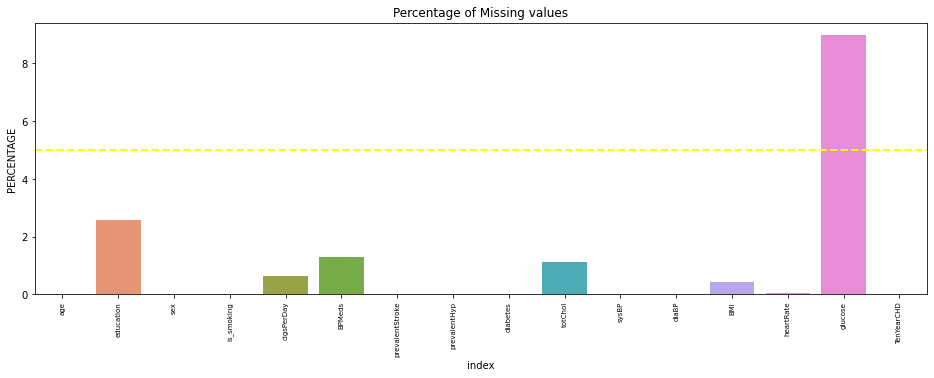

In [20]:
#Visualising the missing values through pointplot
missing = pd.DataFrame((null_val)*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.barplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
ax.axhline(5, color='yellow', linestyle='dashed', linewidth=2)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Observations:**
1. glucose has the maximum numbers of missing values almost 9%.
2. education contains almost 3 % of the missing vaues.
3. cigsPerDay,BPMeds,totChol,they all posses 1%  missing values

Dashed yellow line represent that we will be dropping all missing values in a column whose percantage of missing values lies below this baseline. 

In [21]:
# Function for checking for the presence of null values
def check_null(data):
    
    '''Print the total count of null values present
       in each data column and final shape of the dataset'''
    
    print(data.isna().sum())
    
    print('The shape of our dataset is: {}'.format(data.shape))

In [22]:
# List of all the columns where the null values counts greater than 5%
def drop_null_less_5(d_frame):
    
    '''Creating the list of all those columns where null values ranges between 0 and 5%
       and dropping all those rows that satisfies the condition'''
    
    null_features=[col for col in d_frame.columns if d_frame[col].isna().sum()/len(df)<0.05 and df[col].isna().sum()/len(df)>0]
    
    print('List of all the features that has percetage of missing values lesser than 5%:\n\n{}'.format(null_features))
    
    for col in d_frame.columns:
        if d_frame[col].isna().sum() >0:
       
            if col in null_features:
                d_frame.dropna(subset=[col],inplace=True)
              
        
drop_null_less_5(df)   

List of all the features that has percetage of missing values lesser than 5%:

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']


In [23]:
# Checking for the null values after dropping the null values
check_null(df)

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            262
TenYearCHD           0
dtype: int64
The shape of our dataset is: (3189, 16)


### **Treating the missing values in Glucose**: 
For glucose column that represent the glucose level in the body there are almost 304 nan-values and after dropping the other nan values comes down to 262 and it will not be advisable to drop that much rows from our dataset.We can impute any statistical value of random value to the replace the nan-values,though it will solve our purpose but at the cost of predictions made by our model by harming the accuracy.Therefore, we will be using the iterative  imputer here to fill the missing values and filling the nan-values by the vote of similarity with nearest neighbour.KNN imputer here also works as an algorithm therefore we need to encode the cateorical variables.

Encoding our categorical features to make the dataset suitable for imputation

In [24]:
#Encoding our features 
df['sex'] = df['sex'].map({'M':1,'F':0})
#df['is_smoking']=df['is_smoking'].replace(('yes', 'no'), (1, 0), inplace=True)
df['is_smoking'] = df['is_smoking'].map({'NO':0,'YES':1})

In [25]:
#Checking is the changes applied sucessfully or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3189 non-null   int64  
 1   education        3189 non-null   object 
 2   sex              3189 non-null   int64  
 3   is_smoking       3189 non-null   int64  
 4   cigsPerDay       3189 non-null   float64
 5   BPMeds           3189 non-null   object 
 6   prevalentStroke  3189 non-null   object 
 7   prevalentHyp     3189 non-null   object 
 8   diabetes         3189 non-null   object 
 9   totChol          3189 non-null   float64
 10  sysBP            3189 non-null   float64
 11  diaBP            3189 non-null   float64
 12  BMI              3189 non-null   float64
 13  heartRate        3189 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       3189 non-null   int64  
dtypes: float64(7), int64(4), object(5)
memory usage: 423.5+ KB


In [26]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [27]:
# Imputing missing values using Iterative imputer 

imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42)

df_new = imputer.fit_transform(df)

We get an array after the imputation thus we need to convert the array to dataframe.Also the data type of our categorical dataset would have changed to integer or float thus we need to change it to object as the earlier and we will be doing by passing the dataframe to the function created earlier to change the datatype.

In [28]:
#New dataframe after all the cleaning so far
df_transformed =pd.DataFrame(data=df_new,columns=df.columns) 
df_transformed.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
1,46.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
2,50.0,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
3,64.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
4,61.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


#### Here we have an observation the distribution before and after there the imputation is almost same

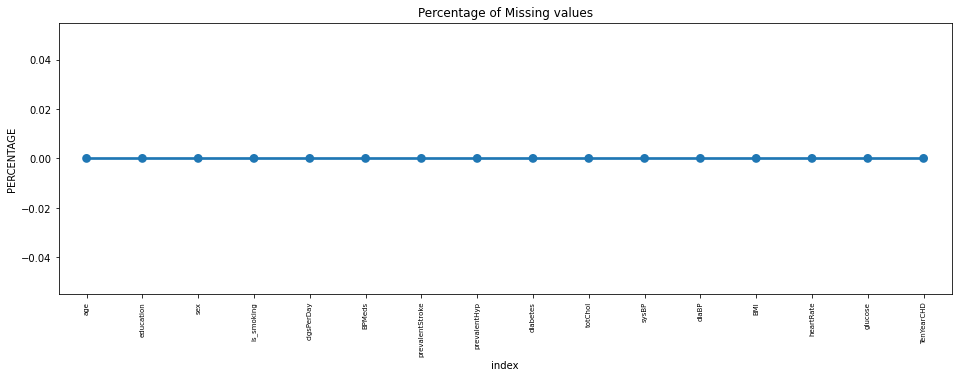

In [29]:
#Visualising the missing values through pointplot
missing = pd.DataFrame((df_transformed.isna().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)

plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**We should look for an anamoly in two columns that if a person smokes i.e is_smoking=1 but cigeratte smoked per day is zero i.e. cigsPerDay=0.Then it might become a conflicting case and we must treat that.**

In [30]:
# No cigarettes smoked though the smoking column is yes
df.loc[(df['is_smoking'] == 1) & (df['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Therefore,there is no record where we could find such an anamoly.

In [31]:
#Getting back all the columns to their appropiate datatype
col_list=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# passing the list to the function convert_dtype 

convert_dtype(df_transformed,col_list,'object')

In [32]:
# Checking for the nan values and the datatype for each colums simultaneously
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3189 non-null   float64
 1   education        3189 non-null   object 
 2   sex              3189 non-null   object 
 3   is_smoking       3189 non-null   object 
 4   cigsPerDay       3189 non-null   float64
 5   BPMeds           3189 non-null   object 
 6   prevalentStroke  3189 non-null   object 
 7   prevalentHyp     3189 non-null   object 
 8   diabetes         3189 non-null   object 
 9   totChol          3189 non-null   float64
 10  sysBP            3189 non-null   float64
 11  diaBP            3189 non-null   float64
 12  BMI              3189 non-null   float64
 13  heartRate        3189 non-null   float64
 14  glucose          3189 non-null   float64
 15  TenYearCHD       3189 non-null   object 
dtypes: float64(8), object(8)
memory usage: 398.8+ KB


In [33]:
#Let's have a look over the first few records of our transformed dataset
df_transformed.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
1,46.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
2,50.0,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
3,64.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
4,61.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1.0


In [34]:
#List of all the numeric variables
num_features=df_transformed.select_dtypes(include=['int64','float64']).columns.values
num_features

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'], dtype=object)

In [35]:
#List of all the categoricla variables
cat_features=df_transformed.select_dtypes(include=['object']).columns.values
cat_features

array(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'], dtype=object)

### 4. Checking for Outliers and their treatement
An Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.It can also be regarded as the odd one out which means something unusual in comparison to the others in a group.
An outlier may occur due to the variability in the data, or due to experimental error/human error.They may indicate an experimental error or heavy skewness in the data(heavy-tailed distribution).

If we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers


1. Boxplots
2. Z-score
3. Inter Quantile Range(IQR)  

We will be using the Box Plot technique for visualising the outliers present in our dataset.we will be plotting the same after the outliers treatment to conform the complete treatement of the ouliers.

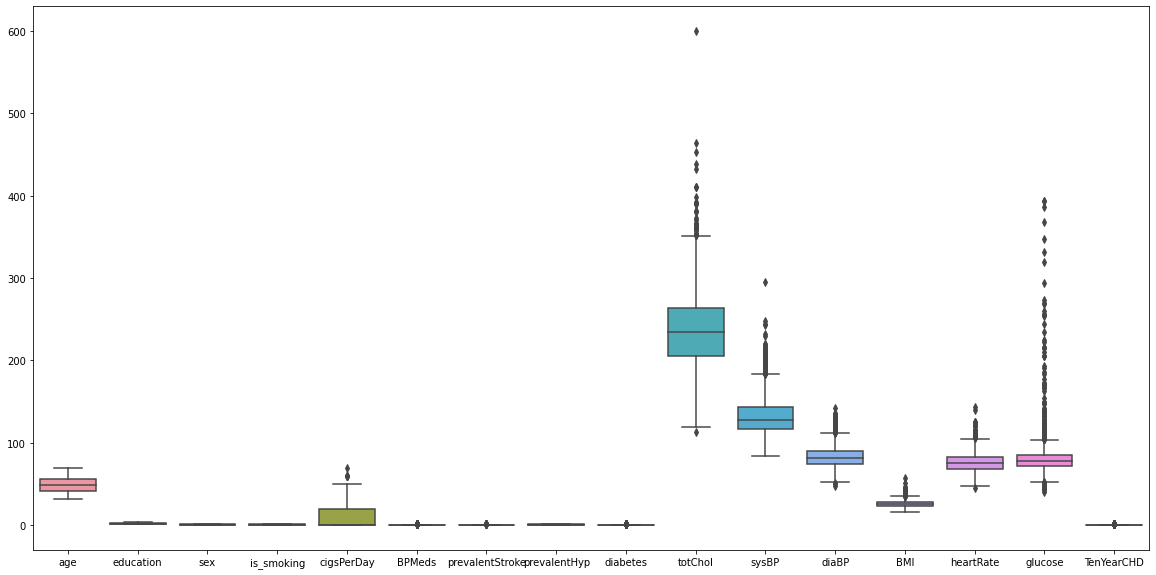

In [36]:
#Plotting the box plot for checking the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df_transformed)
plt.show()

From the the above plot we can see that,outliers are observed in:

1. cigsperday:
2. totchol
3. diaBp
4. sysBP
5. BMI
6. heartRate
7. glucose

#### **Treating the outliers:**
Using the Inter-Quantile Range we will cap the outliers.i.e all those values that lies above the upper whisker will be assigned the value of upper whisker.
$$ Upper Whisker= Q3 + (IQR * 1.5) $$ 

And, all those values that lies below the lower whisker will be assigned the value of lower whisker.

$$ Lower Whisker= Q1 - (IQR * 1.5) $$ 



<img src =https://miro.medium.com/max/1400/1*0MPDTLn8KoLApoFvI0P2vQ.png
 width = "1000" height = "500" >

In [37]:
# treating the outliers using the IQR Method

def outliers(data,cols):
    
    '''Takes dataframe and columns list as the input and treats the outliers using the 
       IQR method and finally capping the outliers within the range.'''
    
    
    for each_feature in cols:
        
        Q1 = np.percentile(data[each_feature], 25) # 25th percentile of the data of the given feature
        Q3 = np.percentile(data[each_feature], 75) # 75th percentile of the data of the given feature
        
        IQR = Q3-Q1 #Interquartile Range
       
        outlier_step = (IQR * 1.5 )
        
        l_whisker= Q1 - (outlier_step)
        u_whisker= Q3 + (outlier_step)
        
               
        data[each_feature]=np.where(data[each_feature] > u_whisker,u_whisker,
                       np.where(data[each_feature] < l_whisker,l_whisker,data[each_feature]))
        
        
# Applying the above fuction to treat for the outliers in our dataset       
feature=['age', 'cigsPerDay','sysBP','diaBP','totChol', 'BMI', 'heartRate', 'glucose']
            
outliers(df_transformed,feature)

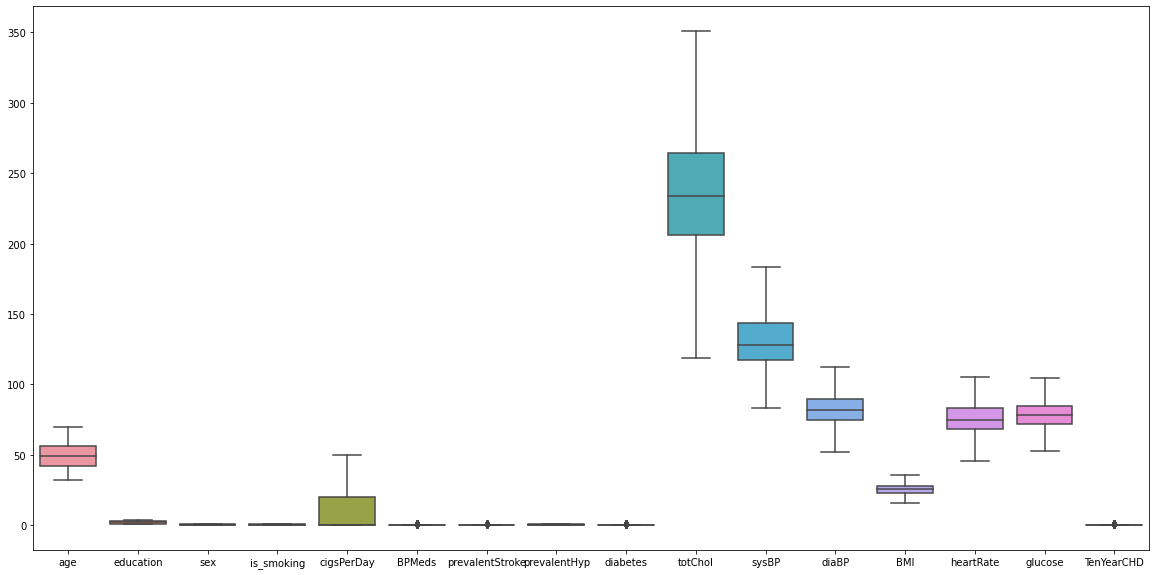

In [38]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df_transformed)
plt.show()

We have sucessfully removed the outliers present,as in the above plot we can see that there are no datapoints above and below the whiskers.

**Now since our dataset is clean from duplicate values,missing values and outliers therefore now we can proceed towards the EDA**

## **Exploratory Data Analysis On the DataSet**

**Why do we perform EDA?**

To analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them.

**Why do you do univariate analysis?**

The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

**Analysation of categorical variables:**

Our dependent variable is "TenYearCHD" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type.

## **1. Univariate Analysis:**
Univariate analysis is a basic kind of analysis technique for analysing the data.Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe.

Here we will be starting our univariate analysis with the categorical features in our dataset and then we will be moving on to the numerical features.

### **Categorical Features**

In [39]:
#Let's have a look at all the categorical features in our dataset,not considered target variable here,we will analyze it separately
cat_var=cat_features[0:-1]
cat_var

array(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'], dtype=object)

In [40]:
#Let's have a look at the unique values in each category
for feature in cat_var:
    print(feature,':')
    print(df_transformed[feature].value_counts())
    print("-----------------")

education :
1.0    1338
2.0     960
3.0     531
4.0     360
Name: education, dtype: int64
-----------------
sex :
0.0    1796
1.0    1393
Name: sex, dtype: int64
-----------------
is_smoking :
0.0    1610
1.0    1579
Name: is_smoking, dtype: int64
-----------------
BPMeds :
0.0    3095
1.0      94
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0.0    3170
1.0      19
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0.0    2190
1.0     999
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0.0    3108
1.0      81
Name: diabetes, dtype: int64
-----------------


### **Observations:**
1. Education has 4 categories in which data is distributed
2. All the other features contains only 2 categories.
3. sex:Male-1,Female-0
4. is_smoking:YES-1,NO-0
5. BPMeds:YES-1,NO-0
6. prevalentStroke:YES-1,NO-0
7. prevalentHyp:YES-1,NO-0
8. diabetes:YES-1,NO-0

In [41]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(10,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df_transformed, x = column)

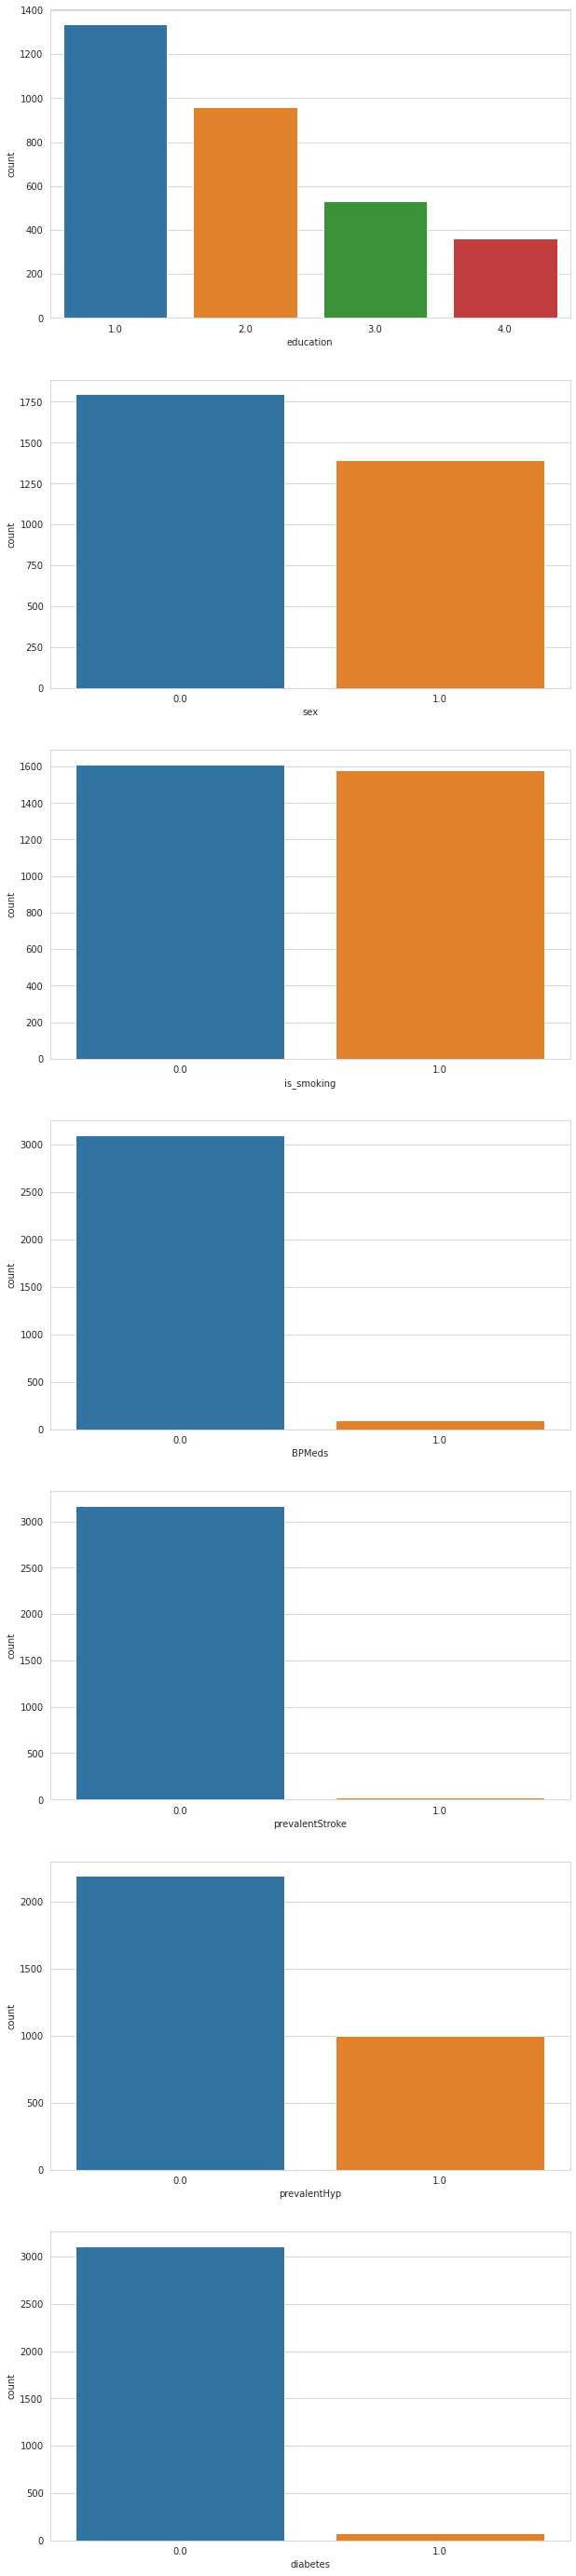

In [42]:
# Creating countplots using above function,,not considering the target variable we will handle it separately
count_plotting(cat_var)

**The graphs above show, categorical columns in the form of countplots, we can understand that:**
1. Females are more in proportion to men by a small margin.
2. There are more non-smokers than smokers, but the count for both the class is comparable.
3. Around 1500 people have an education level 1, and almost 400 people have an education level of 4. 
4. More than 3000 people are not on BP medication
5. Only a small number of people have suffered a stroke previously.
6. Around 1000 people were hypertensive.
7. A large number (> 3000) of the people do not have diabetes.
8. .There are four levels of education whereas the rest categorical features are all binary.

## **Now we will be looking forward NUmerical Features**

In [43]:
#Let's have a look at all the categorical features in our dataset
num_features

array(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'], dtype=object)

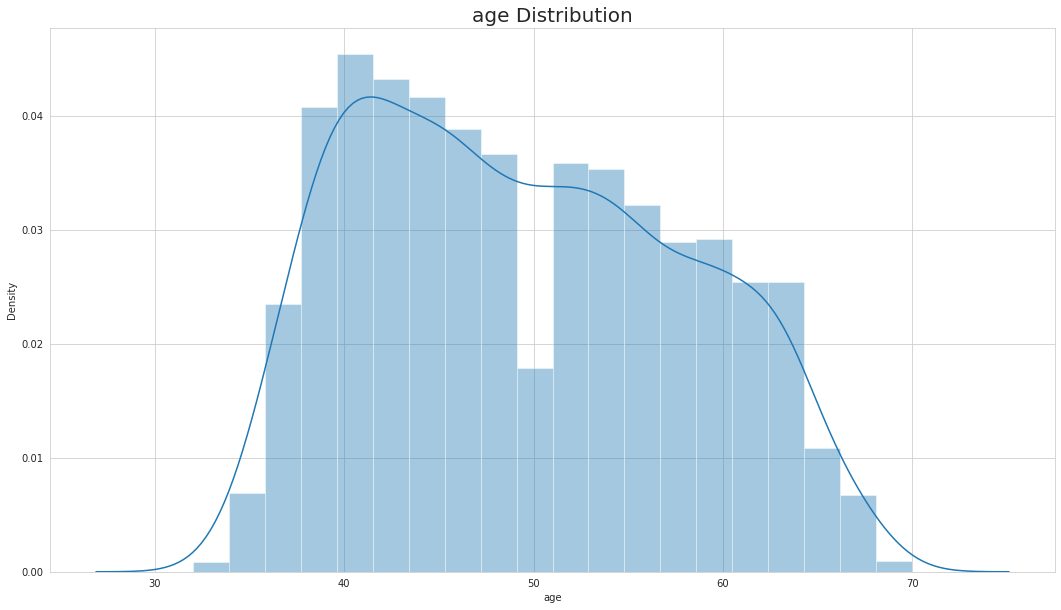

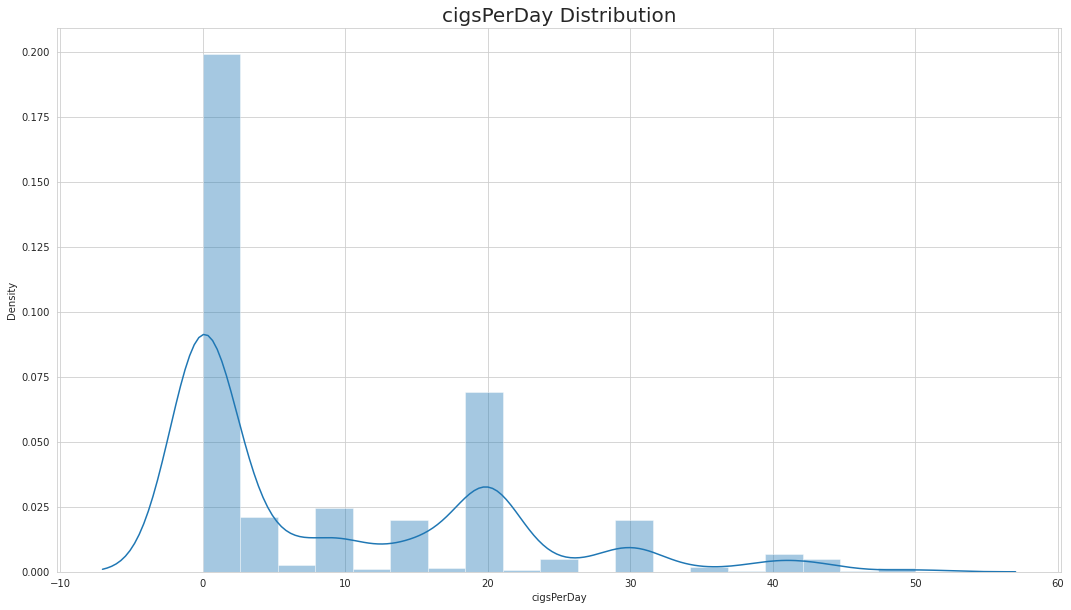

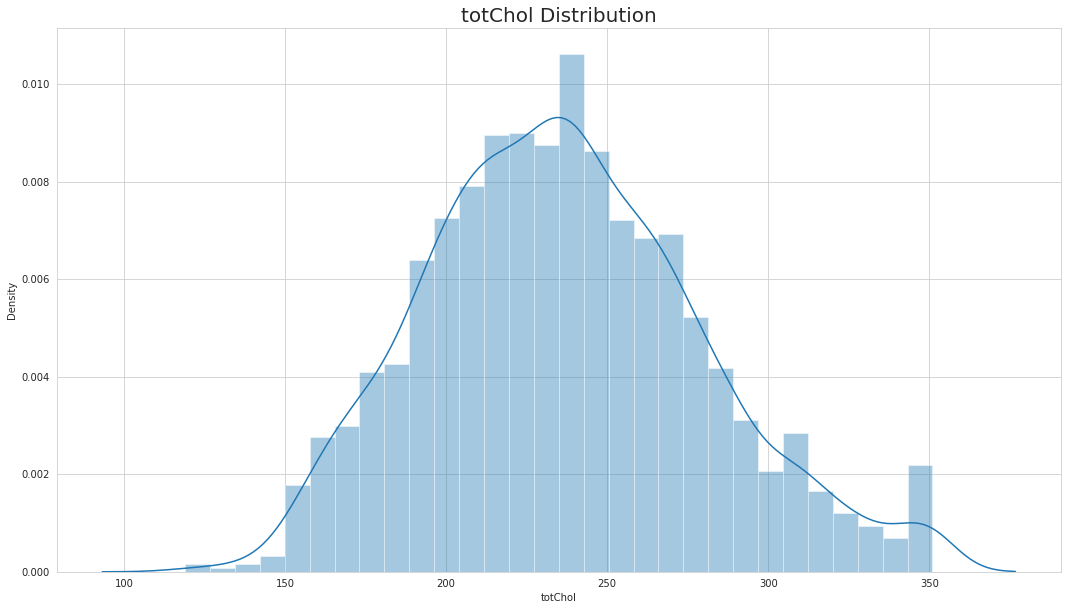

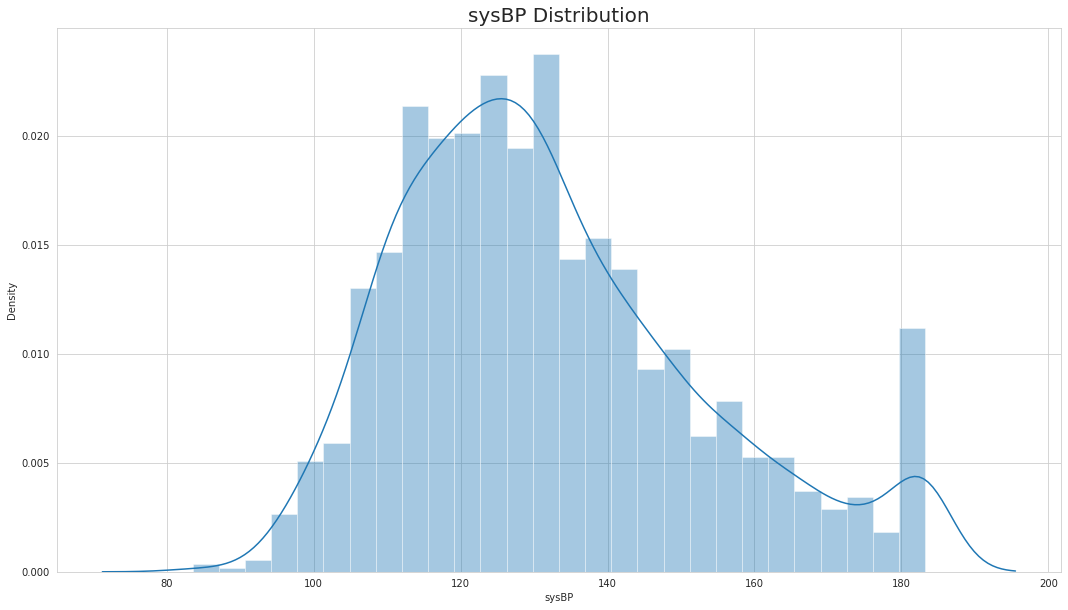

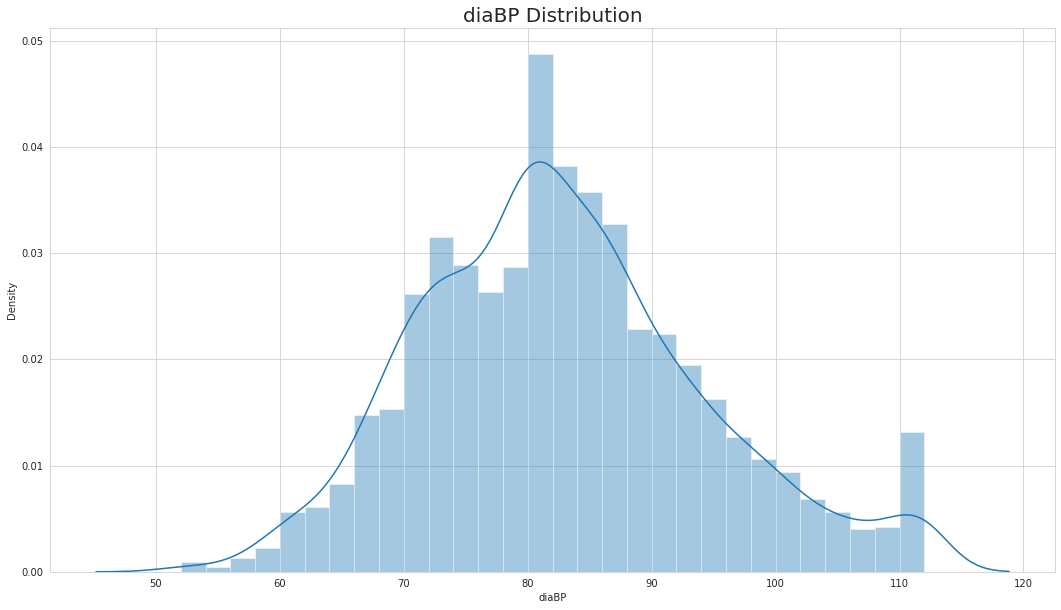

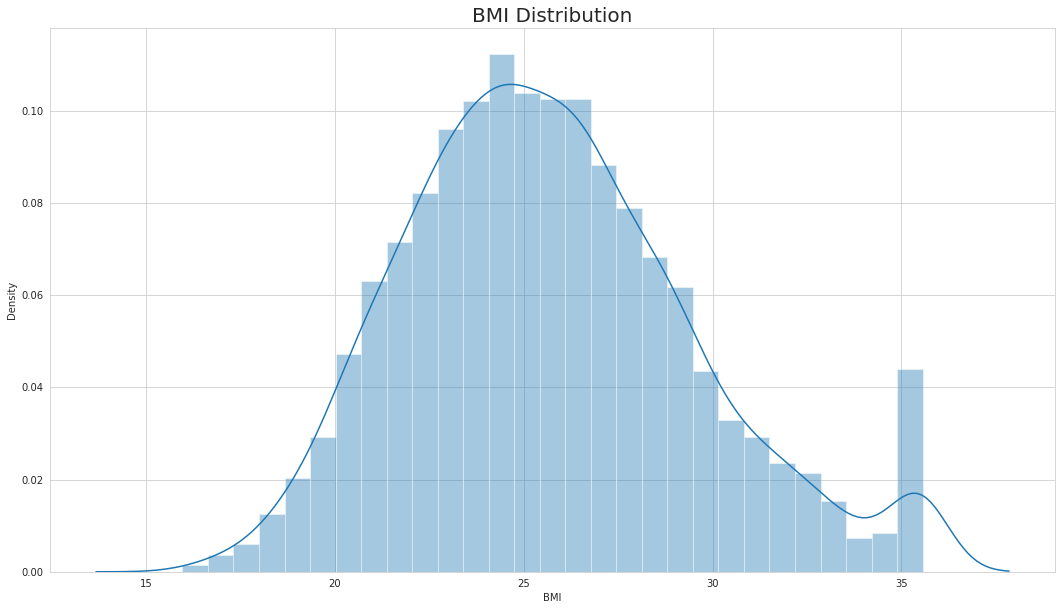

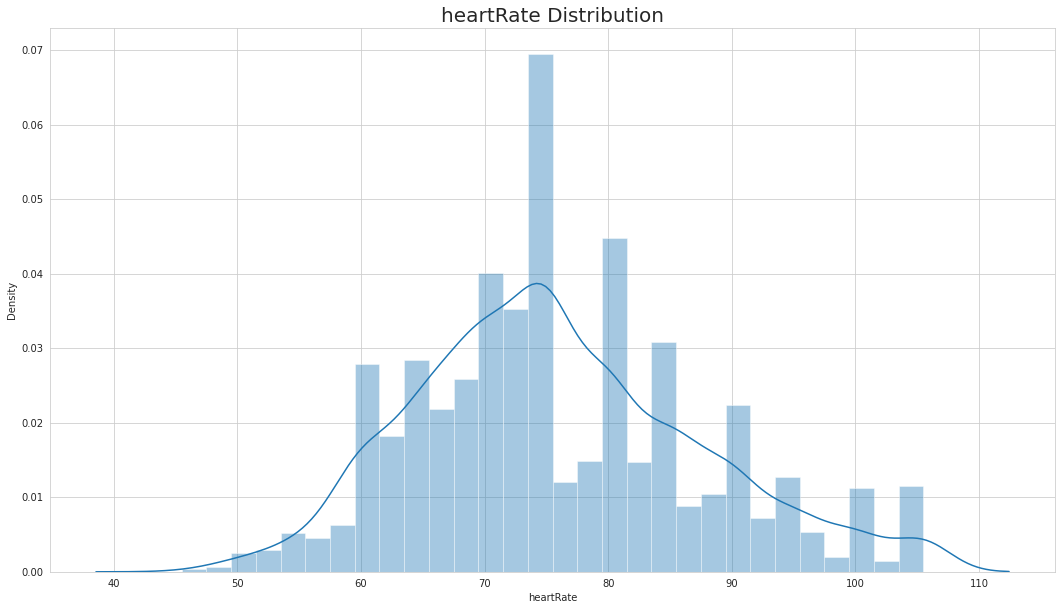

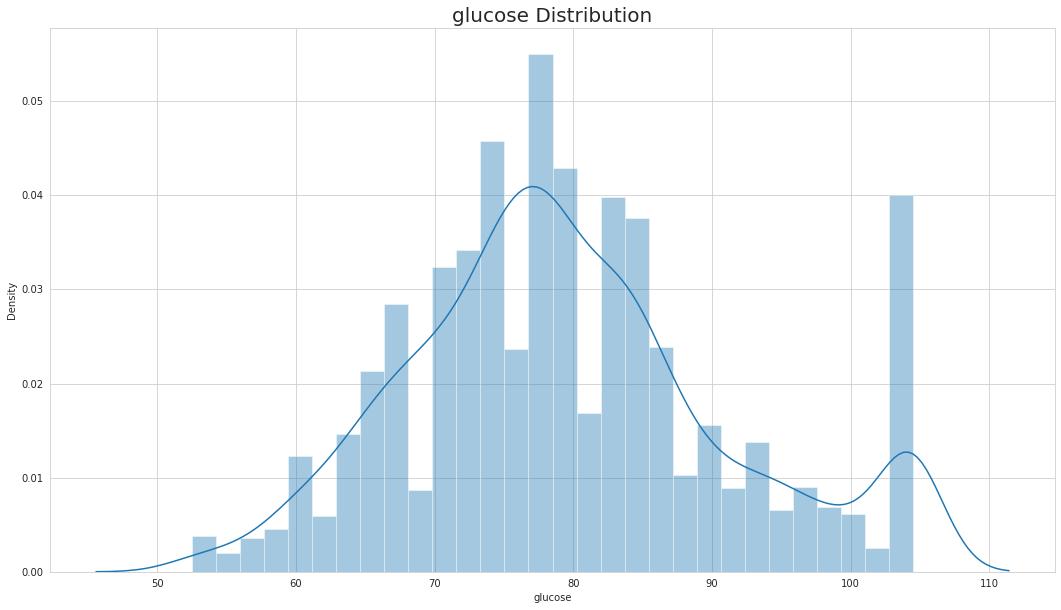

In [44]:
#Plotting the displot to analyse the numerical features
for feature in num_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df_transformed[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

**From the above plot, we can understand that :**

1. Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.
2. Cigarettes smoked per day on an average are majorly 0, but 20 cigarettes a day are also prevalent.
3. Cholestrol ranges form 100 to 700, with most belonging to 150 to 350 and this range is normal according to medical documents .
4. Systolic BP ranges from 100 to 180.
5. Diastolic BP ranges mainly from 60 to 120.
6. BMI ranges mainly from 15 to 40.
7. Heart rate ranges from 50 to 105 and most occurances are around 75.
8. Glucose ranges mainly from 50 to 105.
9. The sudden bump at the end is observed due to capping of the outliers.

## **2. Bivariate Analysis:**
Bivariate analysis means the analysis of the bivariate data. This is a single statistical analysis that is used to find out the relationship that exists between two value sets. The variables that are involved are X and Y.

####**1. We can see which gender has more risk of coronary heart disease.** 

In [45]:
#Creating the dataframe 
df_gender=df_transformed.groupby('sex')[['TenYearCHD']].count().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_gender

,sex,TenYearCHD
0,0.0,1796
1,1.0,1393


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text major ticklabel objects>)

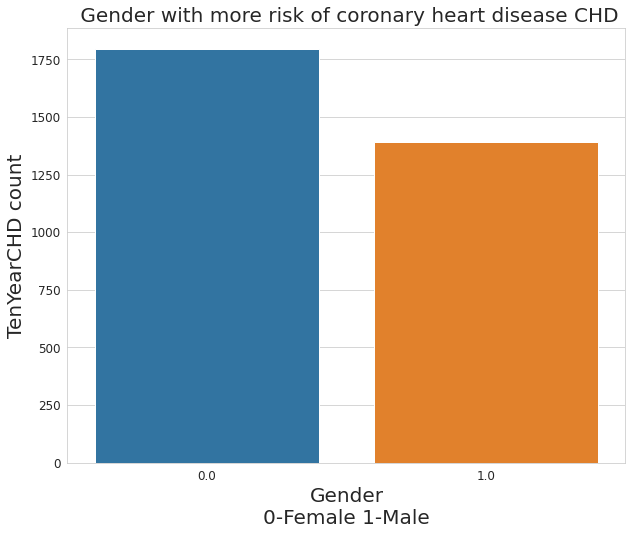

In [46]:
# plotting to answer the above question:
x=df_gender['sex']
y=df_gender['TenYearCHD']
plt.figure(figsize=(10,8), facecolor='w')
sns.barplot(x,y)
plt.title(" Gender with more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0-Female 1-Male",size=20)
plt.ylabel("TenYearCHD count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

####**2. Age group that tends to have more number of smokers**

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

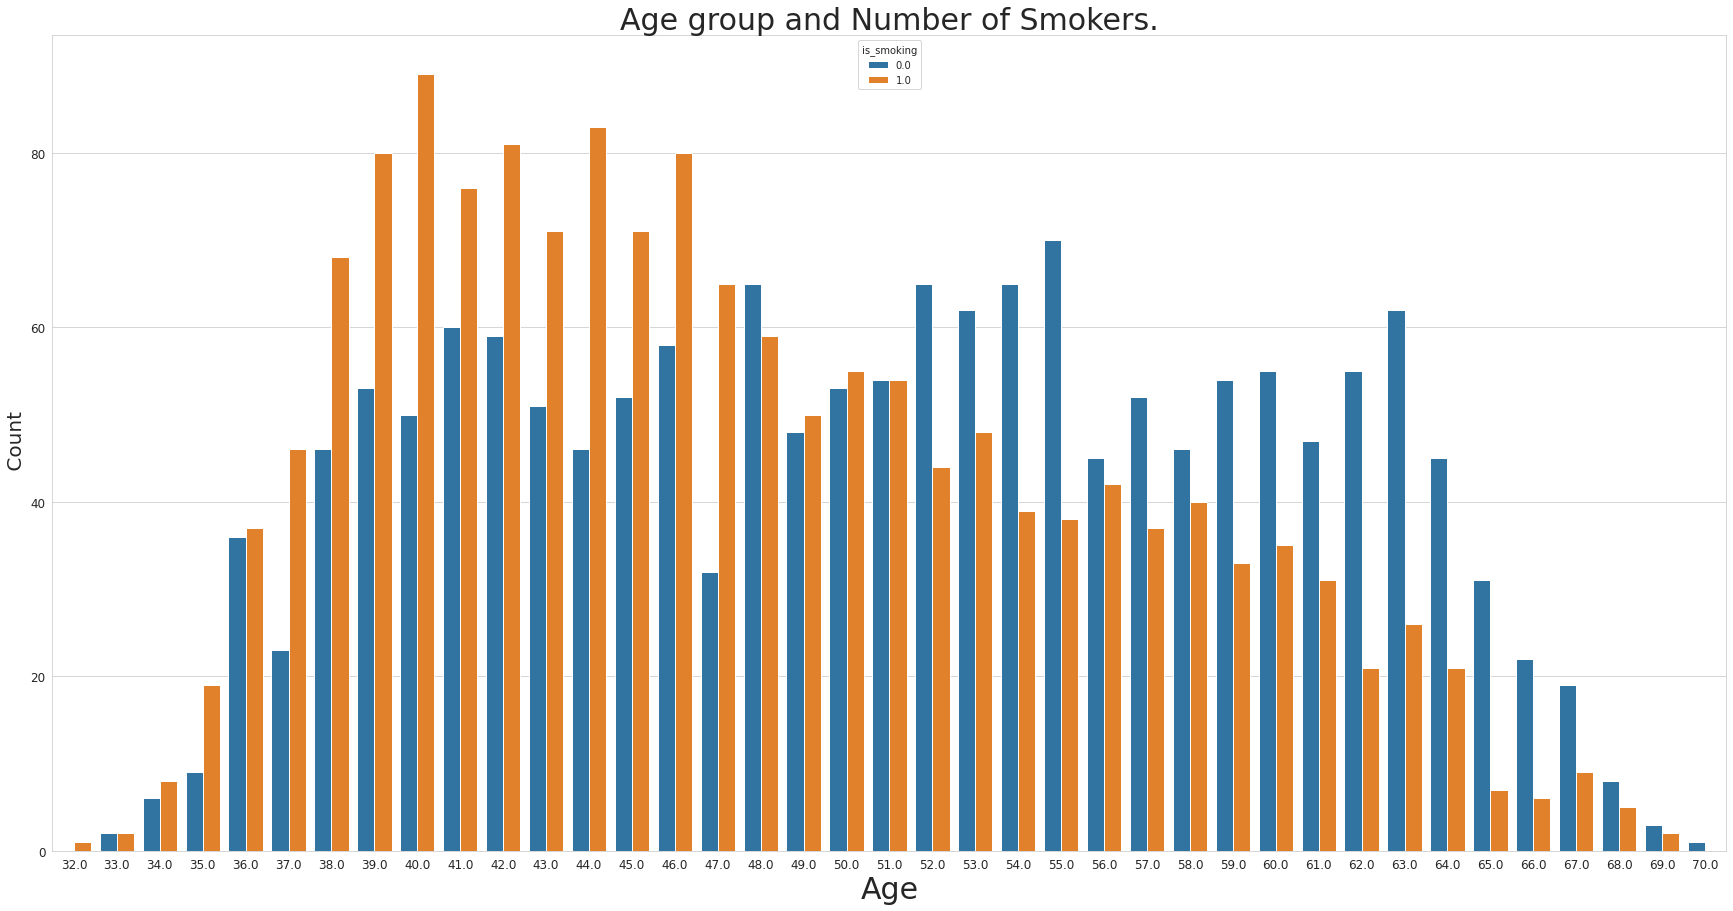

In [47]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df_transformed,hue="is_smoking")
plt.title("Age group and Number of Smokers.", size=30)
plt.xlabel("Age", size=30)
plt.ylabel(" Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


### **3. Effect of Cigarette per day on the risk of Coronary Heart Disease**

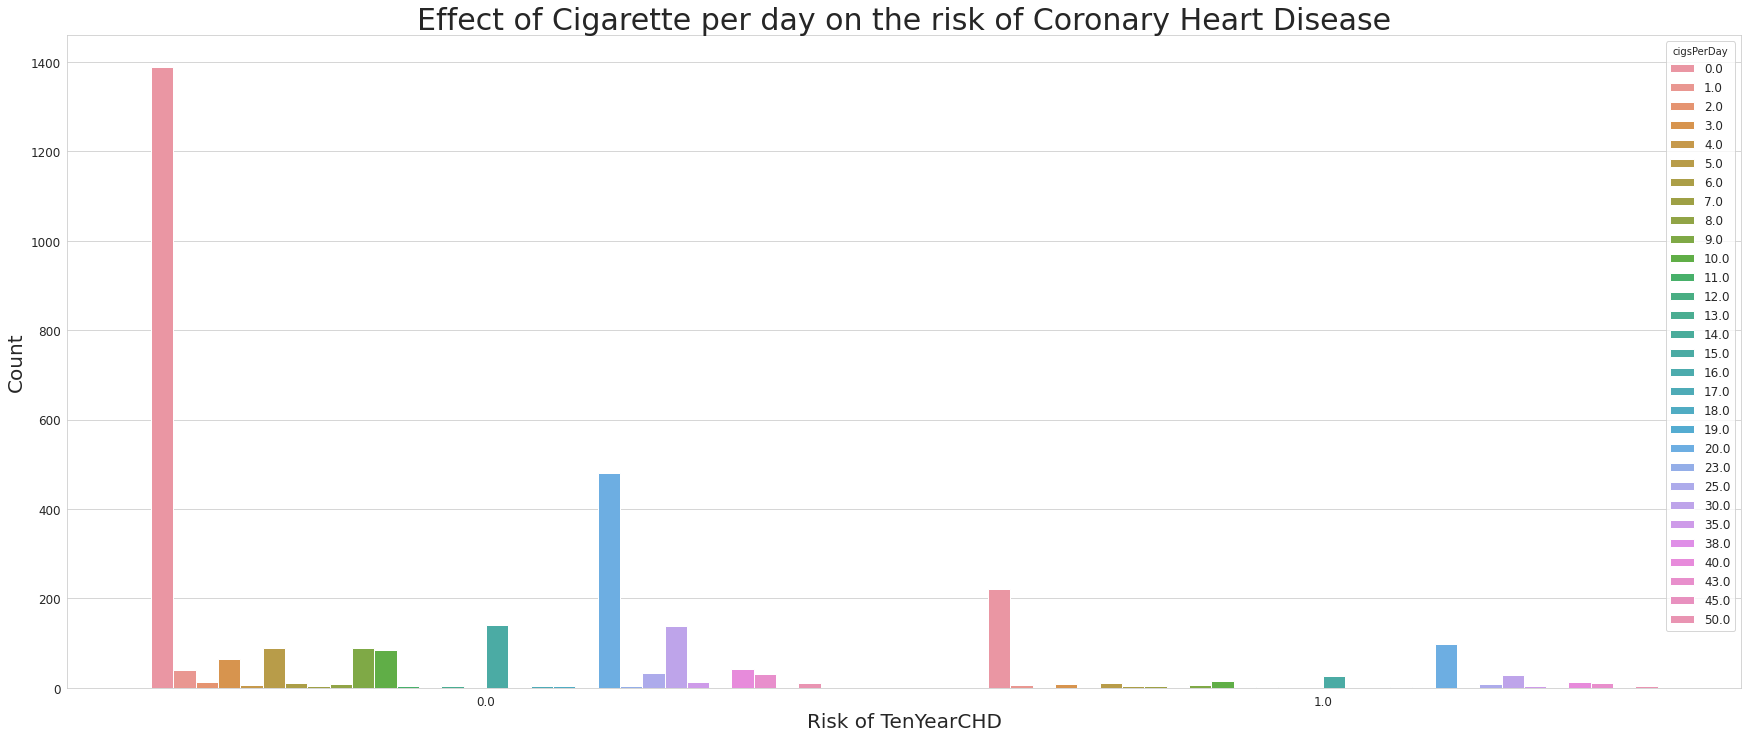

In [48]:
# Visualising the effect of Cigarette per day on the risk of Coronary Heart Disease
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df_transformed,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Effect of Cigarette per day on the risk of Coronary Heart Disease", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

### **4. Effect of sysBP on risk of Coronary Heart Disease**

In [49]:
#Creating the dataframe
df_sys_bp= df_transformed.groupby("TenYearCHD")[['sysBP']].mean().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_sys_bp

,TenYearCHD,sysBP
0,1.0,141.848421
1,0.0,130.186256


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

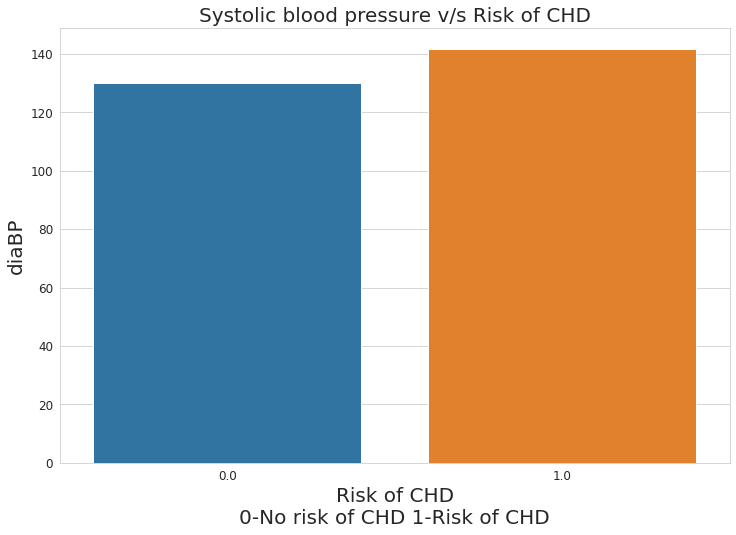

In [50]:
# ploting for the sysbp and how it affects the risk of coronary heart disease
plt.figure(figsize=(12,8), facecolor='w')

sns.barplot(x=df_sys_bp["TenYearCHD"], y=df_sys_bp["sysBP"])
plt.title("Systolic blood pressure v/s Risk of CHD", size=20)
plt.xlabel("Risk of CHD\n0-No risk of CHD 1-Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### **5. Effect of diaBP on risk of Coronary Heart Disease**

In [51]:
#Creating the dataframe
df_diaBP= df_transformed.groupby("TenYearCHD")[['diaBP']].mean().sort_values(by='TenYearCHD',ascending=False).reset_index().head()
df_diaBP

,TenYearCHD,diaBP
0,1.0,86.243158
1,0.0,82.044952


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

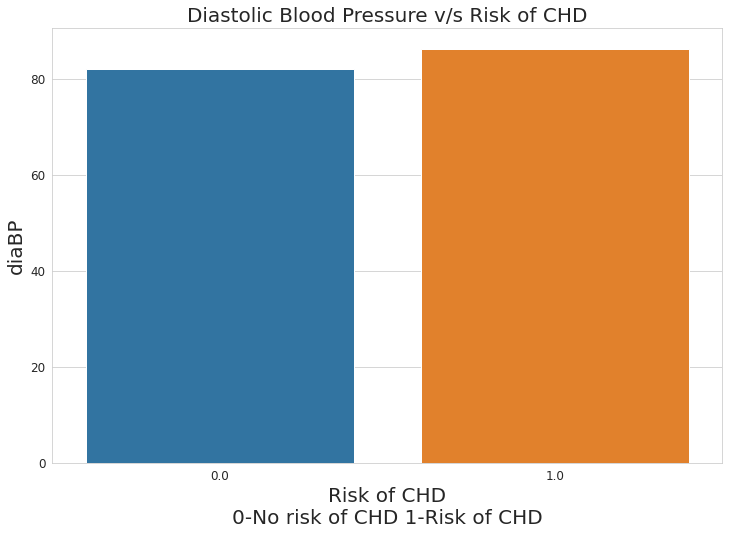

In [52]:
# ploting for the diabp how it affects the risk of coronary heart disease
plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=df_diaBP["TenYearCHD"], y=df_diaBP["diaBP"])
plt.title("Diastolic Blood Pressure v/s Risk of CHD", size=20)
plt.xlabel("Risk of CHD\n0-No risk of CHD 1-Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

### **From the above Bi-Variate analysis,we can draw the following observations:**
1. Females have shown a slighly higher risk of coronary heart disease.
2. The number of current smokers starts to attain a high number from the mid-age i.e.35 and becomes maximum by the age of 40 and slightly starts to decrease in the later age.
3. At the age 32 there were very less or probably no current smokers.
4. Low cigsPerDay comes with lower risk of CHD.
5. Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease.Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD.
6. The normal range of systolic blood pressure is less than 120.As the value of systolic blood pressure shoots above the normal range the risk of Coronary Heart Disease increases.
7. The normal range of diastolic blood pressure is less than 80 mm of Hg.
8. As the value of diastolic blood pressure shoots above the normal range the risk of Coronary Heart Disease increases.
9. Higher the cholestrol level higher is the chance of Heart disease.




### **Multivariate Analysis**
Multivariate analysis takes a whole host of variables into consideration. This makes it a complicated as well as essential tool. The greatest virtue of such a model is that it considers as many factors into consideration as possible. This results in tremendous reduction of bias and gives a result closest to reality.

### **Correlation matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. 

In [53]:
#Creating a function to get the correlation matrix
def co_matrix(dataframe):
  '''Pass in the name of the dataframe and the output will be
     the heatmap representing the correlation matrix'''
     
  convert_dtype(dataframe,cat_features,'float')

  cor=dataframe.corr()
  plt.figure(figsize=(20,10), facecolor='w')
  sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
  plt.title("Correlation among all the Variables of the Dataset", size=20)


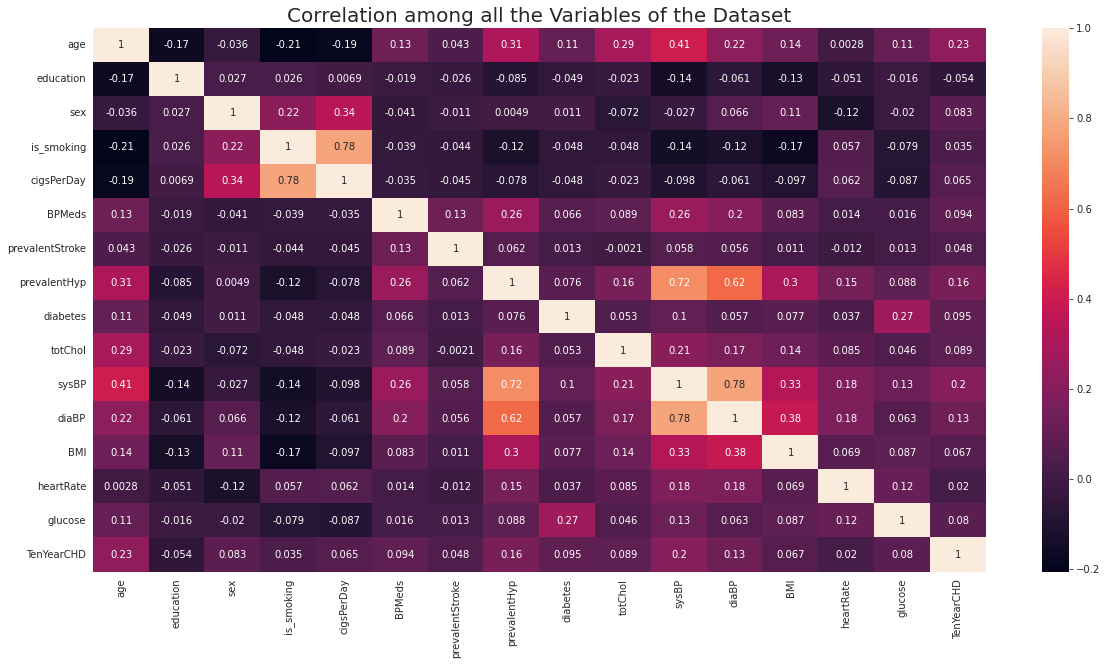

In [54]:
#Using the above function we get our correlation matrix
co_matrix(df_transformed)

### **From the matrix we have the following observations :**
1. Highest correlation exists between systolic BP and diastolic BP.
2. Systolic and Diastolic BP shows a high correlation with  hypertension.
3. Variables such as age, prevalent hypertension, systolic BP, diastolic BP, influence the risk of heart disease mainly.
4. All the variables have a positive correlation with the dependent variable, except for education.
5. Systolic BP and age have a positive correleation.

## **NOTE:**
Since we have studied our independent variables through various analysis now we must go further and analyze the independent variable-**TenYearCHD**

## **Dependent Variable: TenYearCHD**

In [55]:
#Let's have a look the unique values that target variable contains
df_transformed['TenYearCHD'].value_counts()

0.0    2714
1.0     475
Name: TenYearCHD, dtype: int64

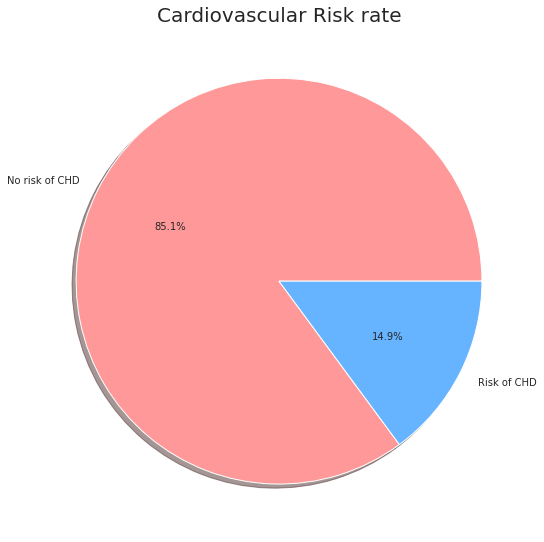

In [56]:
# Let's just have a look at the distribution of the target varibale
plt.figure(figsize=(20, 20), facecolor='w')
labels = ['No risk of CHD','Risk of CHD']
plt.subplot(122)
colors=['#ff9999','#66b3ff']
plt.pie(df_transformed["TenYearCHD"].value_counts(),shadow=True,autopct="%1.1f%%",colors=colors,labels=labels)
plt.title("Cardiovascular Risk rate",size=20)
plt.show()

**Ther is a high imbalanced as the number of negative cases outweigh the number of positive cases and it is not appropiate for fitting such imbalance to our predictive models thus we need to treat this imbalance.**

## **Feature Transformation and Selection**

#### **1. Feature Transformation**
As in the correlation matrix we have seen that there is high correlation between sysBP and diaBP also they both posses greater influence on our target variable thus we can't directly drop them rather we must find certain parameter which can formulate these parameters together so that we can add a single feature and avoid multicollinearity and it Pulse Pressure.

**Pulse pressure** is the difference between your systolic blood pressure, and and diastolic blood pressure.Doctors can use pulse pressure as an indicator of how well your heart is working.

In [57]:
# Adding pulse pressure as a column
df_transformed['p_pressure'] = df_transformed['sysBP'] - df_transformed['diaBP']

# Dropping the sysBP and diaBP columns
df_transformed.drop(['sysBP','diaBP'], axis = 1, inplace = True)

In [58]:
#Let's have a look over the applied changes
df_transformed.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,p_pressure
0,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,29.77,72.0,75.0,0.0,70.0
1,46.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,0.0,45.0
2,50.0,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,28.26,68.0,94.0,1.0,70.0
3,64.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,0.0,51.5
4,61.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,272.0,32.80,85.0,65.0,1.0,70.0


#### **2. Feature Selection**

When building a preddictive model, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.
There are various techniques available for selecting the best features some of which are:
1. Fisher’s Score
2. Correlation Coefficient
3. chi-square Test
4. Informaton Gain.

Here,we will be using the Chi-Square test for selecting the features that influence the most.

In [59]:
# Identify the features with the most importance for the outcome variable Heart Disease

# separate independent & dependent variables
X = df_transformed.loc[:, df_transformed.columns !='TenYearCHD']
y = df_transformed['TenYearCHD']   

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization and printing the features in 
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Independent Feature','Chi_Score']  
 

In [60]:
#Creating the Dataframe from the above operation
featureScores = featureScores.sort_values(by='Chi_Score', ascending=False)
featureScores

,Independent Feature,Chi_Score
13,p_pressure,457.250519
0,age,249.931510
4,cigsPerDay,205.859597
9,totChol,199.719662
7,prevalentHyp,58.674438
12,glucose,34.243363
8,diabetes,27.931583
5,BPMeds,27.187058
2,sex,12.252065
10,BMI,8.294096


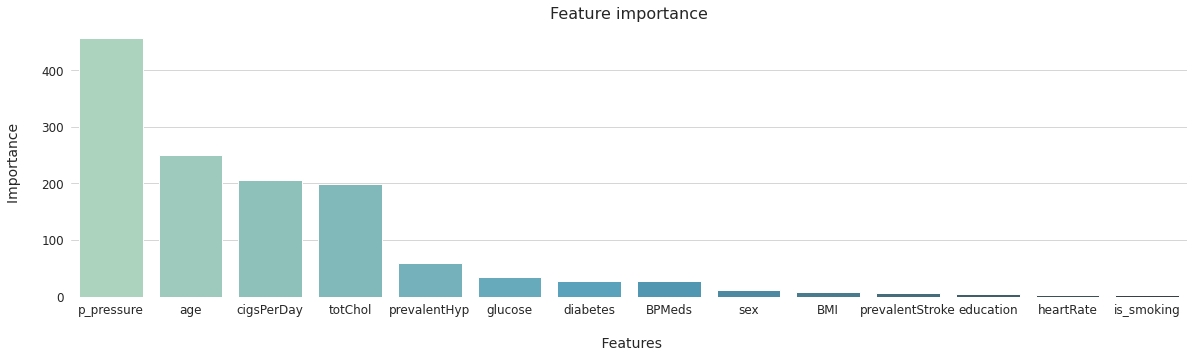

In [61]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Independent Feature', y='Chi_Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Observation:**
 We can see that the feature with least scores are 
1. prevalentStroke-7.21
2. education-4.82
3. heartRate-2.20
4. is_smoking-1.96

Thus,these independent features tend to have least effect on our target variable and therefore must not consider them for the further course of our analysis.

#### **Now we will drop the features that have very low value of Chi-score**

In [62]:
#dropping the least influenced 
df_transformed.drop(['prevalentStroke','education','heartRate','is_smoking','BMI'], axis = 1,inplace=True)

In [63]:
#dataframe with selected features 
df_transformed.head()

,age,sex,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,glucose,TenYearCHD,p_pressure
0,36.0,1.0,0.0,0.0,1.0,0.0,212.0,75.0,0.0,70.0
1,46.0,0.0,10.0,0.0,0.0,0.0,250.0,94.0,0.0,45.0
2,50.0,1.0,20.0,0.0,1.0,0.0,233.0,94.0,1.0,70.0
3,64.0,0.0,30.0,0.0,0.0,0.0,241.0,77.0,0.0,51.5
4,61.0,0.0,0.0,0.0,1.0,0.0,272.0,65.0,1.0,70.0


### **Treatment of the class imbalance in our dataset**

In most simpler terms,when observation in one class is higher than the observation in other classes then there exists a class imbalance.

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.


**We have observed huge imbalance in our target variable and here we are taking certain steps to eliminate the class imblance by using one of the the  techniques available.**

#### **TenYearCHD**
Class 0- 85.1%

Class 1- 14.9%

## **Resampling imbalanced dataset by oversampling positive cases**
Oversampling can be defined as adding more copies to the minority class.

Here, we will be using SMOTE for oversampling.

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. 


In [64]:
# Resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
X, y = sm.fit_resample(df_transformed.drop('TenYearCHD', axis=1), df_transformed['TenYearCHD'])
df_smote = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

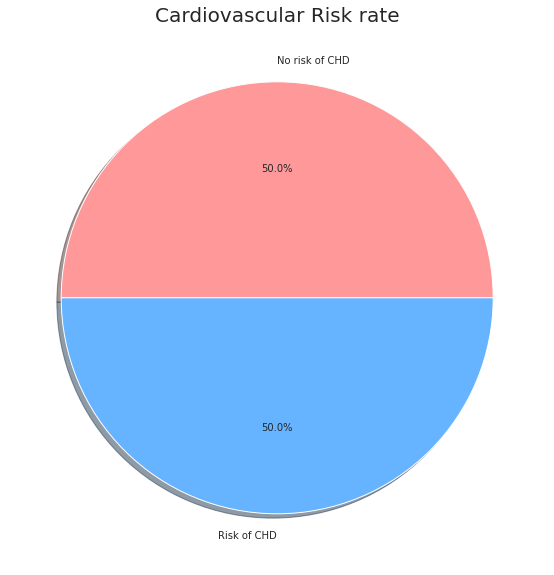

In [65]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
colors=['#ff9999','#66b3ff']
plt.subplot(122)
labels = ['No risk of CHD','Risk of CHD']
plt.pie(df_smote["TenYearCHD"].value_counts(),autopct="%1.1f%%",shadow=True,labels=labels,colors=colors)
plt.title("Cardiovascular Risk rate",size=20)
plt.show()

**Hence,we have treated the imbalance of the target variable.**

### **Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [66]:
#splitting the data set:

#Classifying the X-Independent Variable y-Target Feature
X = df_smote.drop(['TenYearCHD'], axis=1)
y = df_smote['TenYearCHD']

# divide train-test: 80 % - 20 %
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=10)

## Scaling the Independent Variables

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Here we are using MinMax Scalar that is a Normalising techinque that is used to squeez all the values in the range of 0-1.
The underlying formula is shown below:

<img src =https://miro.medium.com/max/1400/1*GwcC80mDUyscDAWtwZSBdA.png width = "500" height = "100" >

In [67]:
# Scaling down all the features to similar range 

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Training and Evaluation**

In this section we will finally be supplying our clean data set into different Classification models and decide on the basis of the metrics that which model could give us the best of predictions.

We will use the following Machine Learning models for the dataset:

1. Logistic Regressor.
2. K-Nearest Neighbour Classifier.
3. Decision Tree Classifier.
4. Random Forest Classifier.
5. Support Vector Machine.
5. Light Gradient Boosting Machine With Grid Search CV.
6. Random Forest Classifier with Randomised Search CV

After fitting our data set to the model we will then look forward to evaluate our model on the basis of the Classification metrics such as:

1. Accuracy:Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.
2. Precision:Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.
3. Recall:Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.
4. F1-Score:It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.
5. ROC-AUC:The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. From the graph, we simply say the area of the curve ABDE and the X and Y-axis.

In [68]:
#Creating a function to calculate all the metrics
def classification_metrics_test(model,train_preds,test_preds):
    '''Pass in the model name,predicted value 
      function will calculate all the metrics'''
    
      
    global train_acc,test_acc,train_f1,test_f1,train_precision,test_precision,train_recall,test_recall,train_roc_auc,test_roc_auc##In order to access these values outside the function also
    
    # check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    print(f"The train accuracy score for {model} is: {round(train_acc,3)}")
    print(f"The test accuracy score for {model} is: {round(test_acc,3)}")
        
    # f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
    train_f1 = f1_score(y_train, train_preds)
    test_f1 = f1_score(y_test, test_preds)
    print(f"The train f1 score for {model} is: {round(train_f1,3)}")
    print(f"The test f1 score for {model} is: {round(test_f1,3)}")
    
    # Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    print(f"The train precision score for {model} is: {round(train_precision,3)}")
    print(f"The test precision score for {model} is: {round(test_precision,3)}")
     
    # recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test,test_preds)
    print(f"The train recall score for {model} is: {round(train_recall,3)}")
    print(f"The test recall score for {model} is: {round(test_recall,3)}")
    
    # ROC-AUC:
    train_roc_auc=roc_auc_score(y_train,train_preds)
    test_roc_auc=roc_auc_score(y_test,test_preds)
    print(f"The train ROC-AUC score for {model} is: {round(train_roc_auc,3)}")
    print(f"The test ROC-AUC score for {model} is: {round(test_roc_auc,3)}")

In [69]:
#Creating a function to show the Confusion Matrix
def confusion_mat(model_name,pred_value):
    '''Supply the model name and predicted set of that model
       the logic will inturn return the Confusion Matrix and the ROC-AUC curve'''
    print(model_name)
    labels = ['No Risk of CHD', 'Risk of CHD']
    cm = confusion_matrix(y_test, pred_value)
    print(cm)

    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(cm), annot=True,cmap="Reds" , fmt='g') #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize=15)
    ax.set_ylabel('True labels',fontsize=15)
    ax.set_title('Confusion Matrix',fontsize=25)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

    print('\n')

    #Getting the ROC-AUC curve
    fpr, tpr, _ = roc_curve(y_test, pred_value)
    auc = roc_auc_score(y_test, pred_value)
    plt.plot(fpr,tpr,label=" auc="+str(auc))
    x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(x,y,'b--',color='b')
    plt.legend(loc=4)
    plt.box(False)
    plt.title ('ROC CURVE KNN')
    plt.show()
   

### **1. Logistic Regression**

Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1.
is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values

This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

The train accuracy score for Logistic Regression is: 0.67
The test accuracy score for Logistic Regression is: 0.676
The train f1 score for Logistic Regression is: 0.673
The test f1 score for Logistic Regression is: 0.679
The train precision score for Logistic Regression is: 0.667
The test precision score for Logistic Regression is: 0.672
The train recall score for Logistic Regression is: 0.678
The test recall score for Logistic Regression is: 0.687
The train ROC-AUC score for Logistic Regression is: 0.67
The test ROC-AUC score for Logistic Regression is: 0.676

Logistic Regression:
[[361 182]
 [170 373]]


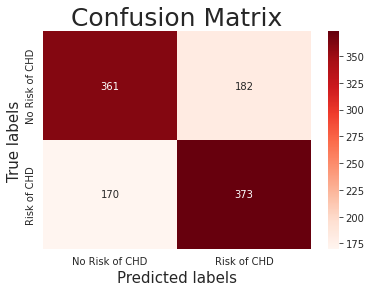

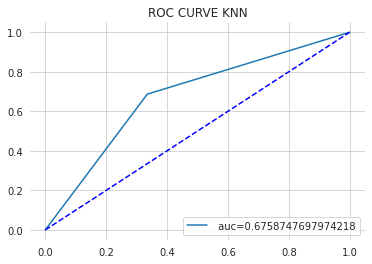

In [70]:
# logistic regression 
#instatiating an object of the class
log_r= LogisticRegression(fit_intercept=True, max_iter=1000)

#fit the train data set to the Logistic regression model
log_reg = log_r.fit(X_train_scaled,y_train)

#predict using the tain set
log_pred_train=log_r.predict(X_train_scaled)

#predict using the test set
log_pred_test = log_r.predict(X_test_scaled)

#Calcutating all the classification metrics using the function
classification_metrics_test('Logistic Regression',log_pred_train,log_pred_test)
print()
#Getting the confusion matrix for the Logistic Regression
confusion_mat("Logistic Regression:",log_pred_test)

In [71]:
met_dict = {'Model': 'Logistic Regresssion',
            'Train Accuracy':train_acc,
            'Test Accuracy':test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision': train_precision,
            'Test Precision': test_precision,
            'Train Recall': train_recall,
            'Test Recall': test_recall,
            'Train ROC AUC': train_roc_auc,
            'Test ROC AUC': test_roc_auc}

metrics_df=pd.DataFrame(met_dict,index=[1])


 **In such a situation,Recall is important as it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected.Thus our study will be more focused towards the recall of the model.**


**For this algorithm,Test Recall is 0.687 and Test f1-score is which is not that good depending upon the problem we are dealing with**

## **2. K Nearest Neighbors**

KNN also called K- nearest neighbour is a supervised machine learning algorithm that can be used for classification and regression problem. K nearest neighbour is non-parametric i,e. It does not make any assumptions for underlying data assumptions.Here the algorithm classifies a input or unseen data set on the basis of characterstics shared by the nearest data points.
These nearest neighbours are decided on the basis of distance between two points.Some of the distance metric used are  listed below:
1. Eucledeon Distance.
2. Cosine Similarity Measure.
3. Minkowsky.
4. Manhattan Distance.

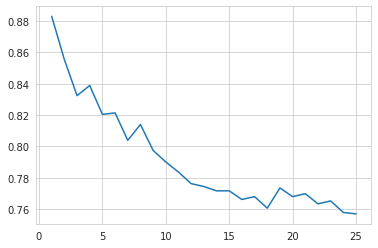

In [72]:
## Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,26):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test_scaled)))

#plotting the k-value vs accuracy
plt.plot(range(1,26),accuracy)


Therefore,maximum accuracy can be seen where k=1.Thus,we will supply this value of k to our model

The train accuracy score for KNN is: 1.0
The test accuracy score for KNN is: 0.883
The train f1 score for KNN is: 1.0
The test f1 score for KNN is: 0.889
The train precision score for KNN is: 1.0
The test precision score for KNN is: 0.848
The train recall score for KNN is: 1.0
The test recall score for KNN is: 0.934
The train ROC-AUC score for KNN is: 1.0
The test ROC-AUC score for KNN is: 0.883

KNN
[[452  91]
 [ 36 507]]


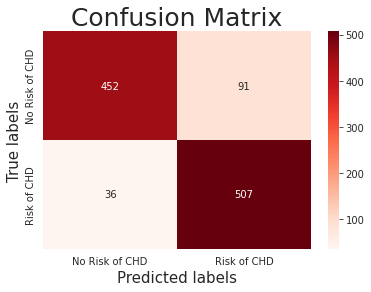

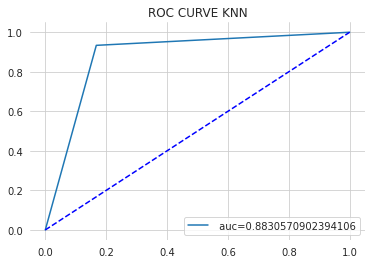

In [73]:
#instatiating an object of the class
knn = KNeighborsClassifier(n_neighbors=1)

#fit the train data set to the K-Nearest Neighbour model
knn_model = knn.fit(X_train_scaled,y_train)

#predict using the train set
knn_pred_train=knn.predict(X_train_scaled)

#predict using the test set
knn_pred_test = knn.predict(X_test_scaled)


#Calcutating all the classification metrics using the function
classification_metrics_test('KNN',knn_pred_train,knn_pred_test)
print()

#Getting the confusion matrix for the KNN  
confusion_mat("KNN",knn_pred_test)

In [74]:
# Storing all the metrics in a dictionary for comaparing later
met_dict = {'Model': "KNN",
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' :test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

**For this algorithm Test Recall is 0.934 and Test f1-score is coming out to be  0.889 that are good metrics to get in comparison with the logistic regression,now lets just see the results of the Decision Tree.**

## **3. Decision Tree**

It is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.


<img src =https://www.precision-analytics.ca/articles/an-introduction-to-decision-tree-theory/tree_diagram.png width = "400" height = "300" >

The train accuracy score for Decision_Tree is: 1.0
The test accuracy score for Decision_Tree is: 0.829
The train f1 score for Decision_Tree is: 1.0
The test f1 score for Decision_Tree is: 0.828
The train precision score for Decision_Tree is: 1.0
The test precision score for Decision_Tree is: 0.83
The train recall score for Decision_Tree is: 1.0
The test recall score for Decision_Tree is: 0.827
The train ROC-AUC score for Decision_Tree is: 1.0
The test ROC-AUC score for Decision_Tree is: 0.829
Decision Tree
[[451  92]
 [ 94 449]]


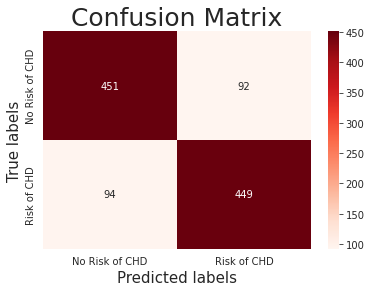

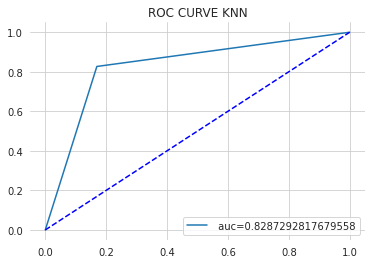

In [75]:
#instatiating an object of the class
dt = DecisionTreeClassifier()

#fit the train data set to the Decision Tree model
dt_model=dt.fit(X_train_scaled,y_train)

#predict using the train set
dt_pred_train=knn.predict(X_train_scaled)

#predict using the test set
dt_pred_test = dt.predict(X_test_scaled)

#Calcutating all the classification metrics using the function   
classification_metrics_test('Decision_Tree',dt_pred_train,dt_pred_test)

#Getting the confusion matrix for the Decision Tree
confusion_mat("Decision Tree",dt_pred_test)

In [76]:
# Storing all the metrics in a dictionary for comaparing later
met_dict = {'Model':'Decision Tree',
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' : test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

**For this algorithm Test Recall is 0.817 and Test f1-score is coming out to be 0.818 ,now lets just see the results of the Random Forest Classifier.**

## **4. Random Forest Classifier**
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning.

"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

The train accuracy score for RandomForestClassifier is: 1.0
The test accuracy score for RandomForestClassifier is: 0.877
The train f1 score for RandomForestClassifier is: 1.0
The test f1 score for RandomForestClassifier is: 0.87
The train precision score for RandomForestClassifier is: 1.0
The test precision score for RandomForestClassifier is: 0.916
The train recall score for RandomForestClassifier is: 1.0
The test recall score for RandomForestClassifier is: 0.829
The train ROC-AUC score for RandomForestClassifier is: 1.0
The test ROC-AUC score for RandomForestClassifier is: 0.877
Random Forest Classifier
[[502  41]
 [ 93 450]]


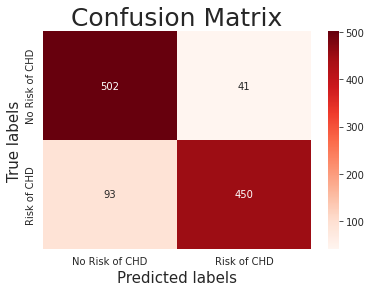

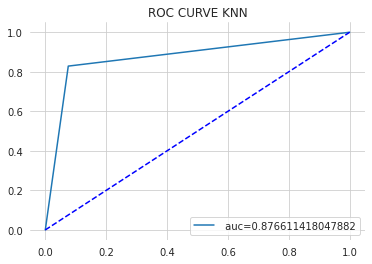

In [77]:
#instatiating an object of the class
rf_c = RandomForestClassifier(n_estimators=1000, random_state=1,max_depth=12)

#fit the train data set to the Random Forest Classifier
rf_c_model=rf_c.fit(X_train_scaled,y_train)

#predict using the train set
rfc_pred_train=knn.predict(X_train_scaled)

#predict using the test set
rfc_pred_test = rf_c.predict(X_test_scaled)

#Calcutating all the classification metrics using the function                    
classification_metrics_test('RandomForestClassifier',rfc_pred_train,rfc_pred_test)

#Getting the confusion matrix and the ROC-AUC curve for the Random Forest Classifier
confusion_mat("Random Forest Classifier",rfc_pred_test)

In [78]:
# Storing all the metrics in a dictionary for comaparing later

met_dict = {'Model':'Random Forest Classifier',
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' : test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

**For this algorithm Test Recall is 0.828 and Test f1-score is 0.87,now lets just see the results of the Support Vector Machine.**

## **5. Support Vector Machine**

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. 

The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

The train accuracy score for SVM is: 0.791
The test accuracy score for SVM is: 0.787
The train f1 score for SVM is: 0.776
The test f1 score for SVM is: 0.768
The train precision score for SVM is: 0.838
The test precision score for SVM is: 0.845
The train recall score for SVM is: 0.723
The test recall score for SVM is: 0.703
The train ROC-AUC score for SVM is: 0.791
The test ROC-AUC score for SVM is: 0.787
SVM
[[473  70]
 [161 382]]


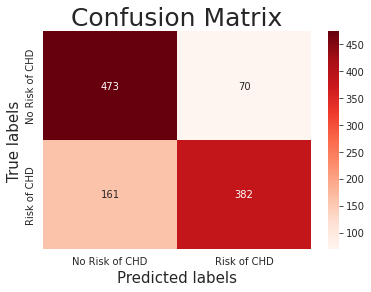

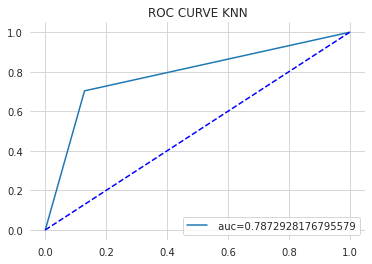

In [79]:
# Support Vector Machine
#instatiating an object of the class
svm = SVC()

#fit the train data set to the SVM
svm_model=svm.fit(X_train_scaled,y_train)


#predict using the train set
svm_pred_train=svm.predict(X_train_scaled)

#predict using the test set                      
svm_pred_test = svm.predict(X_test_scaled)

#Calcutating all the classification metrics using the function
classification_metrics_test('SVM',svm_pred_train,svm_pred_test)

#Getting the confusion matrix and the ROC-AUC curve for the Random Forest Classifier
confusion_mat("SVM",svm_pred_test)

In [80]:
# Storing all the metrics in a dictionary for comaparing later

met_dict = {'Model':'SVM',
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' : test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

**For this algorithm Test Recall is 0.703 and Test f1-score is 0.768,now lets just see the results of the LGBM.**

## **6. Light Gradient Boosting Machine With Grid Search CV**

LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage. 

It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks 

Gradient-based One Side Sampling Technique for LightGBM: 
Different data instances have varied roles in the computation of information gain. The instances with larger gradients(i.e., under-trained instances) will contribute more to the information gain. GOSS keeps those instances with large gradients (e.g., larger than a predefined threshold, or among the top percentiles), and only randomly drop those instances with small gradients  to retain the accuracy of information gain estimation.

In [81]:
params = { 'max_depth': [2,3,4] ,'n_estimators':[60,70] ,'num_leaves': [2,3] }

lgbm = LGBMClassifier( objective='binary', n_jobs=-1)

lightcv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
lightcv = GridSearchCV(estimator=lgbm, param_grid=params,scoring='recall',cv=5,verbose=False)
lightcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'),
             param_grid={'max_depth': [2, 3, 4], 'n_estimators': [60, 70],
                         'num_leaves': [2, 3]},
             scoring='recall', verbose=False)

In [82]:
# Let's get the bets parameters
lightcv.best_estimator_

LGBMClassifier(max_depth=2, n_estimators=60, num_leaves=2, objective='binary')

In [83]:
#Prediting using the hypertunned LGBM 
lgb_model = lightcv.best_estimator_

#predict using the train set
lgb_pred_train= lgb_model.predict(X_train_scaled)

#predict using the test set                                      
lgb_pred_test= lgb_model.predict(X_test_scaled)

The train accuracy score for LGBM is: 0.752
The test accuracy score for LGBM is: 0.766
The train f1 score for LGBM is: 0.765
The test f1 score for LGBM is: 0.776
The train precision score for LGBM is: 0.727
The test precision score for LGBM is: 0.745
The train recall score for LGBM is: 0.808
The test recall score for LGBM is: 0.808
The train ROC-AUC score for LGBM is: 0.752
The test ROC-AUC score for LGBM is: 0.766
LGBM
[[393 150]
 [104 439]]


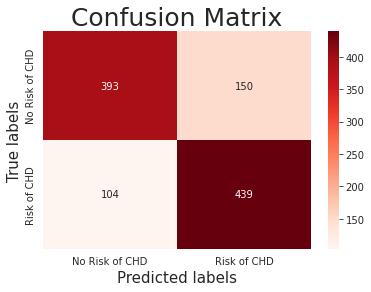

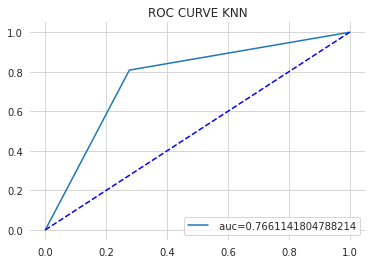

In [84]:
#Calcutating all the classification metrics using the function
classification_metrics_test('LGBM',lgb_pred_train,lgb_pred_test)

#Getting the confusion matrix and the ROC-AUC curve for the LGBM
confusion_mat("LGBM",lgb_pred_test)

In [85]:
# Storing all the metrics in a dictionary for comaparing later

met_dict = {'Model':'LGBM  With Grid Search CV',
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' : test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

In [86]:
importances_lgbm = lgb_model.feature_importances_

#Creating a dictonary in order to form the data frame
importance_lgbm_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_lgbm}
#Creating the dataframe
importance_df_lgbm = pd.DataFrame(importance_lgbm_dict)


In [87]:
#rounding the values upto 2 decimal places
importance_df_lgbm['Feature Importance'] = round(importance_df_lgbm['Feature Importance'],2)

In [88]:
#Looking at the dataframe 
importance_df_lgbm.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,sex,32
0,age,14
4,prevalentHyp,9
2,cigsPerDay,3
3,BPMeds,1
5,diabetes,1
6,totChol,0
7,glucose,0
8,p_pressure,0


In [89]:
features = X_train.columns
importances = lgb_model.feature_importances_
indices = np.argsort(importances)

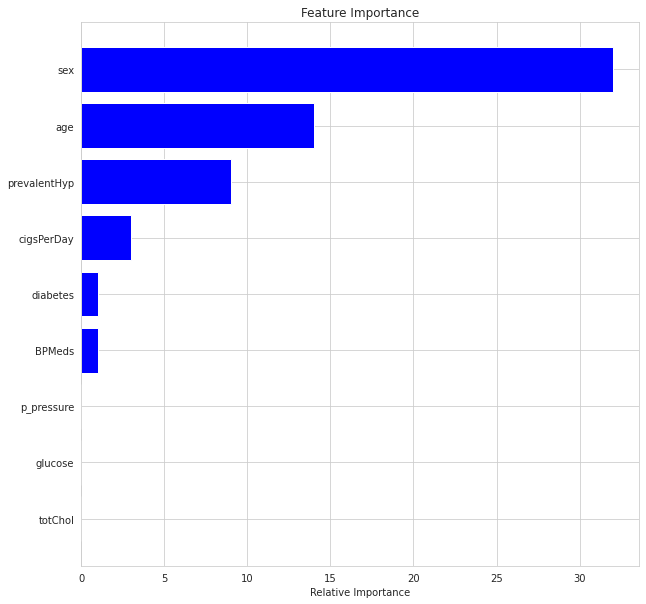

In [90]:
#Plot the figure
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**For this algorithm Test Recall is 0.808 and Test f1-score is 0.776,now lets just see the results of the Random Forest Classifier Using Randomised Search CV**

## **7. Random Forest Classifier Using Randomised Search CV**

In [91]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree                        
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [92]:
# Use the random grid to search for best hyperparameters
# Creating the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [93]:
rf_hyper = rf_random.best_estimator_
# Fit the model to the train data set
rf_hyper.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       n_estimators=1400)

In [94]:
#predict using the train set
rf_pred_train=rf_hyper.predict(X_train_scaled)
#predict using the test set                               
rf_pred_test = rf_hyper.predict(X_test_scaled)

The train accuracy score for rf is: 1.0
The test accuracy score for rf is: 0.892
The train f1 score for rf is: 1.0
The test f1 score for rf is: 0.888
The train precision score for rf is: 1.0
The test precision score for rf is: 0.926
The train recall score for rf is: 1.0
The test recall score for rf is: 0.853
The train ROC-AUC score for rf is: 1.0
The test ROC-AUC score for rf is: 0.892
rf
[[506  37]
 [ 80 463]]


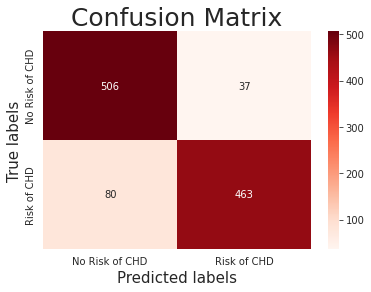

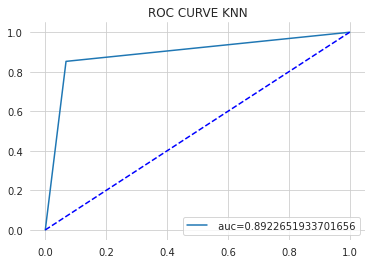

In [95]:
#Calcutating all the classification metrics using the function
classification_metrics_test('rf',rf_pred_train,rf_pred_test)

#Getting the confusion matrix and the ROC-AUC curve for the LGBM
confusion_mat("rf",rf_pred_test)

In [96]:
# Storing all the metrics in a dictionary for comaparing later

met_dict = {'Model':'RFC Using Randomised Search CV',
            'Train Accuracy' : train_acc,
            'Test Accuracy': test_acc,
            'Train F1-score':train_f1,
            'Test F1-score':test_f1,
            'Train Precision':train_precision,
            'Test Precision' : test_precision,
            'Train Recall' : train_recall,
            'Test Recall' : test_recall,
            'Train ROC AUC' : train_roc_auc,
            'Test ROC AUC' : test_roc_auc}
print()
metrics_df=metrics_df.append(met_dict,ignore_index=True)

In [97]:
importances = rf_hyper.feature_importances_

#Creating a dictonary in order to form the data frame
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
#Creating the dataframe
importance_df = pd.DataFrame(importance_dict)


In [98]:
#rounding the values upto 2 decimal places
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [99]:
#Looking at the dataframe 
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,age,0.19
1,sex,0.16
6,totChol,0.15
4,prevalentHyp,0.14
8,p_pressure,0.14
7,glucose,0.12
2,cigsPerDay,0.08
3,BPMeds,0.02
5,diabetes,0.01


In [100]:
features = X_train.columns
importances = rf_hyper.feature_importances_
indices = np.argsort(importances)

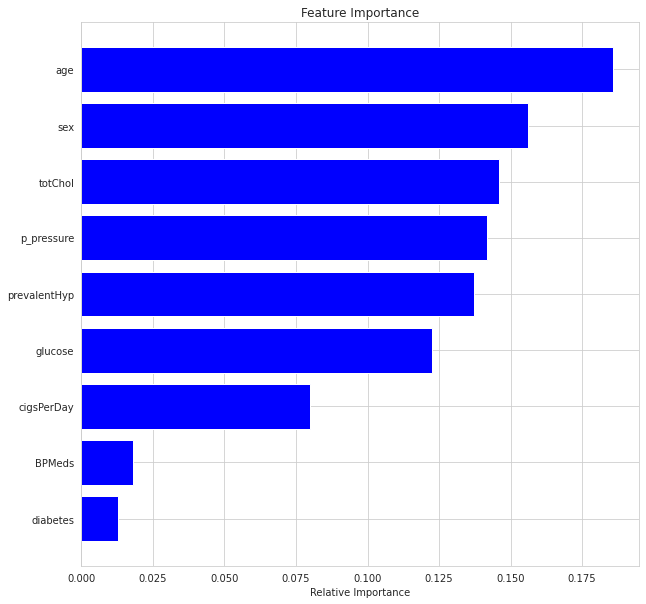

In [101]:
#Plot the figure
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**For this algorithm Test Recall is 0.858 and Test f1-score is 0.892.**

**Let's see all the metrics in the form of dataframe inorder to make it easy for comparison.**

In [102]:
#Lets see all the metrics and make conclusions
metrics_df

,Model,Train Accuracy,Test Accuracy,Train F1-score,Test F1-score,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regresssion,0.669968,0.675875,0.672607,0.679417,0.667271,0.672072,0.678029,0.686924,0.669968,0.675875
1,KNN,1.000000,0.883057,1.000000,0.888694,1.000000,0.847826,1.000000,0.933702,1.000000,0.883057
2,Decision Tree,1.000000,0.828729,1.000000,0.828413,1.000000,0.829945,1.000000,0.826888,1.000000,0.828729
3,Random Forest Classifier,1.000000,0.876611,1.000000,0.870406,1.000000,0.916497,1.000000,0.828729,1.000000,0.876611
4,SVM,0.791340,0.787293,0.775964,0.767839,0.837694,0.845133,0.722708,0.703499,0.791340,0.787293
5,LGBM With Grid Search CV,0.752418,0.766114,0.765437,0.775618,0.727197,0.745331,0.807923,0.808471,0.752418,0.766114
6,RFC Using Randomised Search CV,1.000000,0.892265,1.000000,0.887824,1.000000,0.926000,1.000000,0.852670,1.000000,0.892265


# **Summary and Conclusions:**

## **Summary:**
The raw data was cleaned by treating the outliers and null values, an EDA was performed to get a clear insight of the each feature, transformation of data was done in  order to ensure it fits well into machine learning models.Then finally the cleaned form of data was passed into 5 different models and the metrics were generated to evaluate the model and then we did hyperparameter tuning in order to ensure the correct parameters being passed to the model and model perform well on the dataset.

## **Conclusion:**
*   7 models were used in the project namely,
        1. Logistic Regressor.
        2. K-Nearest Neighbour Classifier.
        3. Decision Tree Classifier.
        4. Random Forest Classifier.
        5. Support Vector Machines.
        6. Light Gradient Boosting Machine With Grid Search CV.
        7. Random Forest Classifier with Randomised Search CV.

1.	The models that could can be deployed according to our study is KNN with Accuracy-0.883,Precision-0.847,Recall-0.933.

2.	Better model can be developed that can predict the risk of coronary heart disease.

3.	With the help of the experts we can engineer an extensive amount of variable that could make our prediction more accurate.

4.	Hence, we can say that Machine Learning can help save lives of many and help them to switch over to a healthy lifestyle to chop off any health related issue. 





